# Całkowanie

Stanislav Shelemekh

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [182]:
using Polynomials

In [183]:
function legend_poly(degree)
    if degree == 0
        return Poly([1])
    end
    
    x = Poly([0, 1])
    
    if degree == 1
        return x
    end
    
    k = degree
    
    return(2*(k-1)+1)/(k)*x*legendPoly(k-1) - (k-1)/k*legendPoly(k-2)

end     

legend_poly (generic function with 1 method)

In [184]:
using Plots

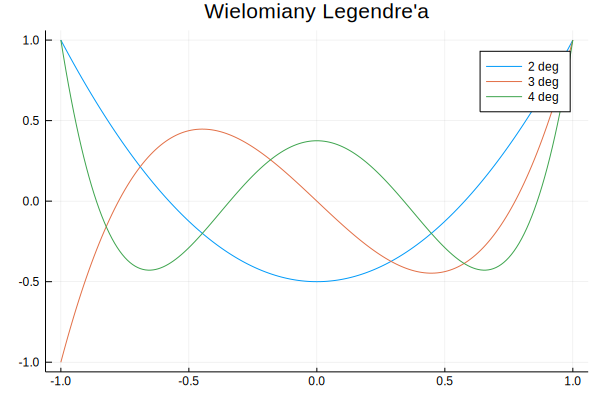

In [185]:
xs = -1:0.01:1
ys(k) = [legend_poly(k)(x) for x in xs]

plot(xs, ys(2), title="Wielomiany Legendre'a", label="2 deg")
plot!(xs, ys(3), label="3 deg")
plot!(xs, ys(4), label="4 deg")

### Sprawdzenie czy zera wielomanów Legendre'a są odciętymi punktów Gaussa

In [186]:
using QuadGK

In [187]:
function test(degree)
    legend_roots = [round.(x, digits=12) for x in roots(legend_poly(degree))]
    gauss_points = [round.(x, digits=12) for x in gauss(degree)[1]]
    
    println("legend: ", legend_roots)
    println("gauss: ", gauss_points)
    
    if legend_roots == gauss_points
        println("Zera wielomianów Legendre'a są odciętymi punktów Gaussa")
    else
        println("Punkty jednak się różnią :(")
    end
end

test (generic function with 1 method)

In [188]:
test(1)

legend: [0.0]
gauss: [0.0]
Zera wielomianów Legendre'a są odciętymi punktów Gaussa


In [189]:
test(2)

legend: [-0.57735026919, 0.57735026919]
gauss: [-0.57735026919, 0.57735026919]
Zera wielomianów Legendre'a są odciętymi punktów Gaussa


In [190]:
test(3)

legend: [-0.774596669241, 0.774596669241, 0.0]
gauss: [-0.774596669241, 0.0, 0.774596669241]
Punkty jednak się różnią :(


In [191]:
test(4)

legend: [-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594]
gauss: [-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594]
Zera wielomianów Legendre'a są odciętymi punktów Gaussa


### Wniosek

Miejsca zerowe oraz odcięte punktów Gaussa są takie same. Wynik trzeciego testu jest też pozytwny, bo metoda roots nie uszeregowała miejsca zerowe tak samo jak swój wynik funkcja gauss. Z podstawowego twierdzenia kwadratur Gaussa można wywnioskować, że miejsca zerowe wielomianu stopnia n są odciętymi n-punktowej kwadratury.

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [192]:
using QuadGK

In [193]:
function integrateGauss(k, f)
    (x,w)=gauss(k)
    return sum(w .* f.(x))
end

integrateGauss (generic function with 1 method)

In [194]:
for n in 2:100
    f(x) = x^n
    actual = integrateGauss(n, f)
    (i, e) = quadgk(f, -1, 1, order=n)
    if actual > i + e || actual < i - e
        println("Na ", n, "-tym stopniu przestaje być dokładna")
        break
    end
end

Na 5-tym stopniu przestaje być dokładna


### Wniosek

Zgodnie z twierdzeniem o dokładności stopnia wielomianu kwadratury Gaussa, jest ona dokładna dla stopnia wielomianu co najwyżej 2k-1

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [195]:
function integrateOver(f, a, b)
    (x, w) = gauss(7)
    return round((b-a)/2 * sum(w .* f.((b-a)/2 .* x .+ (b+a)/2)), digits=12)
end

integrateOver (generic function with 1 method)

In [196]:
f(x) = x^2
integrateOver(f, -2, 2)

5.333333333333

In [197]:
integrateOver(x->x^2+x^3, 0, 10)

2833.333333333334

Analitycznie otrzymujemy: 2833.333333333333

In [198]:
integrateOver(cos, -2, 11)

-0.091051046

Analitycznie otrzymujemy: −0.09069277972502176 

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

Przykładowo już użyłem tej funkcji we wcześniejszych zadaniach.

#### Liczenie podanej całki

In [199]:
using QuadGK

In [200]:
f(x) = 1 / sqrt(2pi) * exp(-x^2 / 2)
(I, E) = quadgk(f, -Inf, Inf)
println("Całka z funkcji jest równa: ",I, "\nMożliwy błąd: ", E)

Całka z funkcji jest równa: 1.0000000000032583
Możliwy błąd: 1.4395584941504537e-8
